# Louvain

This notebook illustrates the hierarchical clustering of graphs by the [Louvain hierarchical algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy
from sknetwork.hierarchy import cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Hierarchy**

In [5]:
louvain_hierarchy = LouvainHierarchy()
dendrogram = louvain_hierarchy.fit_transform(adjacency)

In [6]:
image = svg_dendrogram(dendrogram)

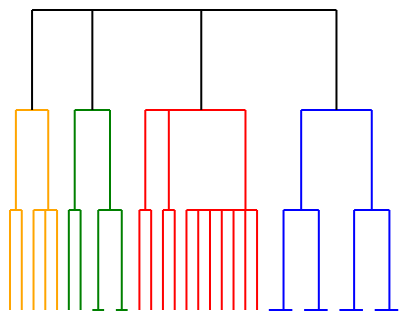

In [7]:
SVG(image)

**Cuts of the dendrogram**

In [8]:
labels = cut_straight(dendrogram)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [9]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=4, return_dendrogram=True)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [12]:
_, counts = np.unique(labels, return_counts=True)

In [13]:
image = svg_dendrogram(dendrogram_aggregate, names=counts, rotate_names=False)

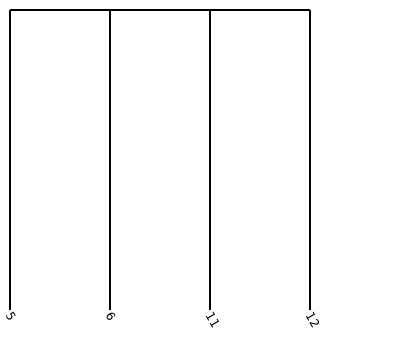

In [14]:
SVG(image)

In [11]:
image = svg_graph(adjacency, position, labels=labels)

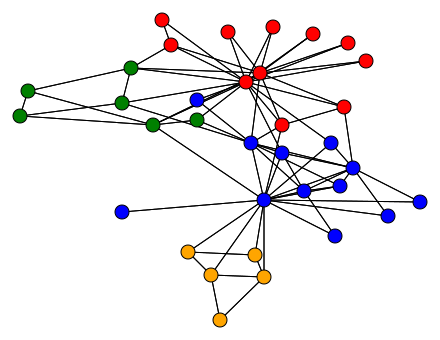

In [12]:
SVG(image)

**Metrics**

In [13]:
dasgupta_score(adjacency, dendrogram)

0.5878582202111614

In [14]:
tree_sampling_divergence(adjacency, dendrogram)

0.44847800698542856

## Digraphs

In [15]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Hierarchy**

In [16]:
louvain_hierarchy = LouvainHierarchy()
dendrogram = louvain_hierarchy.fit_transform(adjacency)

In [17]:
image = svg_dendrogram(dendrogram, names, rotate=True)

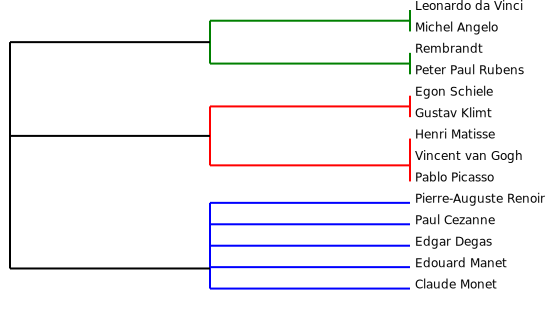

In [18]:
SVG(image)

**Cuts of the dendrogram**

In [19]:
# cut with 3 clusters
labels = cut_straight(dendrogram, n_clusters = 3)
print(labels)

[1 0 2 0 2 2 1 0 1 2 1 0 0 1]


In [20]:
image = svg_digraph(adjacency, position, names=names, labels=labels)

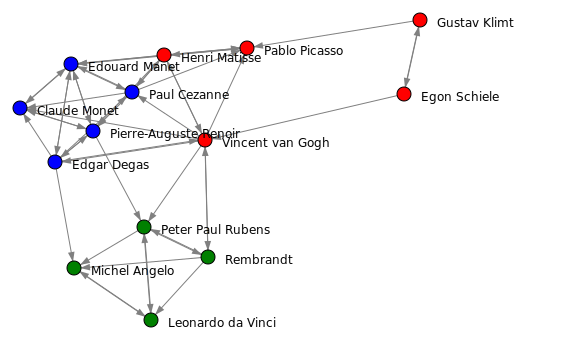

In [21]:
SVG(image)

**Metrics**

In [22]:
dasgupta_score(adjacency, dendrogram)

0.4842857142857142

In [23]:
tree_sampling_divergence(adjacency, dendrogram)

0.42595079927794577

## Bigraphs

In [24]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Hierarchy**

In [25]:
bilouvain = BiLouvainHierarchy()
bilouvain.fit(biadjacency)
dendrogram_row = bilouvain.dendrogram_row_
dendrogram_col = bilouvain.dendrogram_col_
dendrogram_full = bilouvain.dendrogram_full_

In [26]:
image = svg_dendrogram(dendrogram_row, names_row, n_clusters=4, rotate=True)

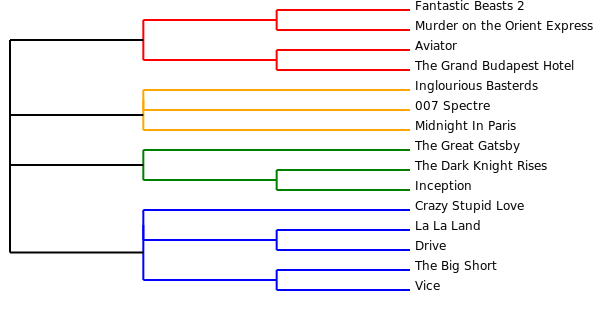

In [27]:
SVG(image)

In [28]:
image = svg_dendrogram(dendrogram_col, names_col, n_clusters=4, rotate=True)

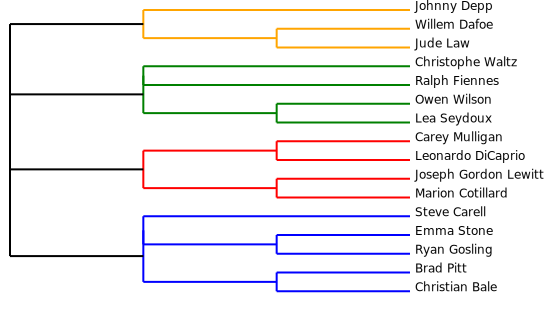

In [29]:
SVG(image)

**Cuts of the dendrogram**

In [30]:
labels = cut_straight(dendrogram_full, n_clusters = 4)
n_row = biadjacency.shape[0]
labels_row = labels[:n_row]
labels_col = labels[n_row:]

In [31]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)

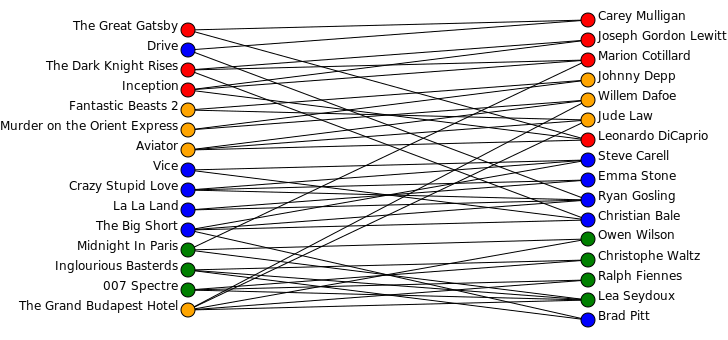

In [32]:
SVG(image)